<a href="https://colab.research.google.com/github/Kashara-Alvin-Ssali/Machine-Learning/blob/main/EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install tensorflow

In [23]:
from google.colab import drive
import zipfile
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths
drive_path = "/content/drive/My Drive/Dataset.zip"  # Update path if needed
zip_path = "/content/Dataset.zip"  # Destination in Colab
extract_path = "/content/Dataset"

# Copy dataset from Drive to Colab
shutil.copy(drive_path, zip_path)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, "").count(os.sep)
    indent = " " * (level * 4)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * ((level + 1) * 4)
    for f in files:
        print(f"{subindent}{f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset/
    Dataset/
        Validation/
            Fake/
                9f.jpg
                2000_f6.jpg
                2000_f4.jpg
                2000_f2.jpg
                2000_f1.jpg
                10f.jpg
                2000_f5.jpg
                2000_f3.jpg
            Real/
                2000_s8.jpg
                2000_s5.jpg
                2000_s6.jpg
                32.jpg
                r13.jpg
                2000_s7.jpg
                43.jpg
                39.jpg
                44.jpg
                2000_s4.jpg
        Testing/
            Fake/
                Fake1.jpg
                fake.jpg
            Real/
                Real.jpg
                Real1.jpg
        Training/
            Fake/
                500_f1.jpg
                4f.jpg
                1f.jpg
                2000_f6.jpg
                14.jpg
       

In [24]:
# Define dataset paths
base_dir = "/content/Dataset/Dataset"
train_dir = os.path.join(base_dir, "Training")
val_dir = os.path.join(base_dir, "Validation")
test_dir = os.path.join(base_dir, "Testing")

# Image preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')


Found 62 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [25]:
# Check class distribution in the training data
import os

def check_class_distribution(data_dir):
  """Checks the number of images in each class directory."""
  for class_name in os.listdir(data_dir):
      class_path = os.path.join(data_dir, class_name)
      if os.path.isdir(class_path):
          num_images = len(os.listdir(class_path))
          print(f"Class '{class_name}': {num_images} images")

print("Training data distribution:")
check_class_distribution(train_dir)
print("\nValidation data distribution:")
check_class_distribution(val_dir)
print("\nTest data distribution:")
check_class_distribution(test_dir)

Training data distribution:
Class 'Fake': 27 images
Class 'Real': 35 images

Validation data distribution:
Class 'Fake': 8 images
Class 'Real': 10 images

Test data distribution:
Class 'Fake': 2 images
Class 'Real': 2 images


In [26]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load EfficientNetB0 without top layers
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build new classification layers on top
efficientnet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Fake vs. Real)
])

# Compile model
efficientnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
EPOCHS = 10
history = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.5545 - loss: 0.7090 - val_accuracy: 0.5556 - val_loss: 0.6905
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.5219 - loss: 0.7170 - val_accuracy: 0.4444 - val_loss: 0.6992
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4677 - loss: 0.6997 - val_accuracy: 0.5556 - val_loss: 0.6877
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5437 - loss: 0.6929 - val_accuracy: 0.5556 - val_loss: 0.6982
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.5215 - loss: 0.7620 - val_accuracy: 0.5556 - val_loss: 0.6921
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5437 - loss: 0.7214 - val_accuracy: 0.5556 - val_loss: 0.6878
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5003 - loss: 0.7148 - val_accuracy: 0.5556 - val_loss: 0.6870
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5219 - loss: 0.6919 - val_accuracy: 0.5556 - val_loss: 0.6886
Epoch 9/10
2/

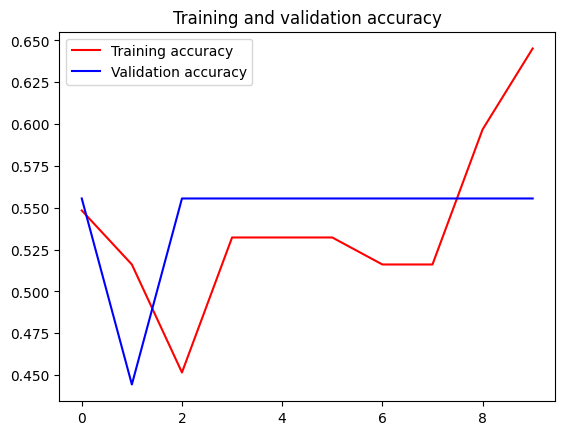

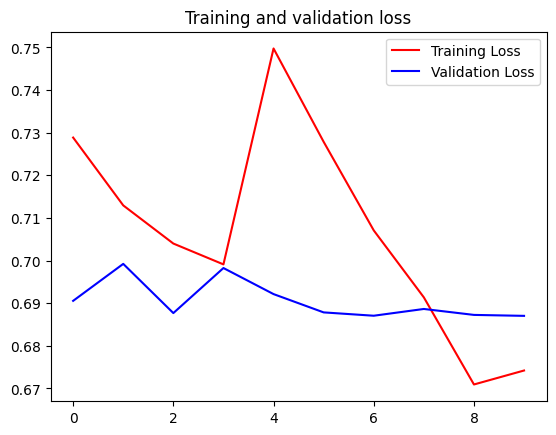

In [27]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_loss, test_acc = efficientnet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5000 - loss: 0.6982
Test Accuracy: 50.00%


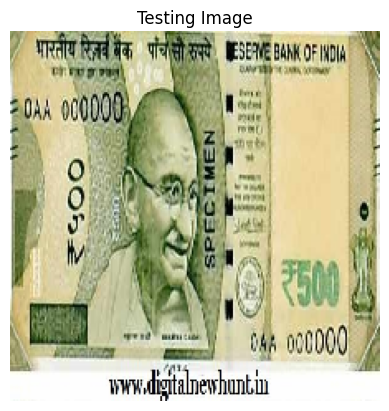

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Real (Confidence: 54.99%)


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the image path
img_path = "/content/Dataset/Dataset/Testing/Fake/Fake1.jpg"  # Ensure the path is correct

# Load the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size

# Convert image to array and normalize
img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show the image
plt.imshow(img)
plt.axis("off")
plt.title("Testing Image")
plt.show()

# Make prediction using efficientnet_model
prediction = efficientnet_model.predict(img_array) # We are now correctly referencing the model

# Interpret the result
class_labels = {0: "Fake", 1: "Real"}  # Ensure class mapping matches train_generator.class_indices
predicted_class = "Real" if prediction[0][0] > 0.5 else "Fake"

# Print the result
print(f"Predicted Class: {predicted_class} (Confidence: {prediction[0][0] * 100:.2f}%)")

In [30]:
efficientnet_model.save("/content/drive/My Drive/efficientnet_fake_currency_model.h5")
